In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from zoology.analysis.utils import fetch_wandb_runs
from zoology.analysis.d_model import plot

In [3]:
df = fetch_wandb_runs(
    launch_id=[
        "default-2023-10-25-22-20-38", 
        "default-2023-10-26-19-09-31",
        "default-2023-10-27-04-13-56",
        "default-2023-10-27-16-27-20"
    ], 
    project_name="zoology"
)

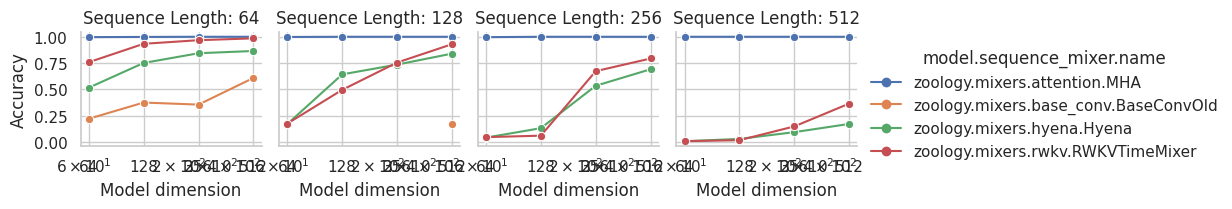

In [4]:
plot(df)

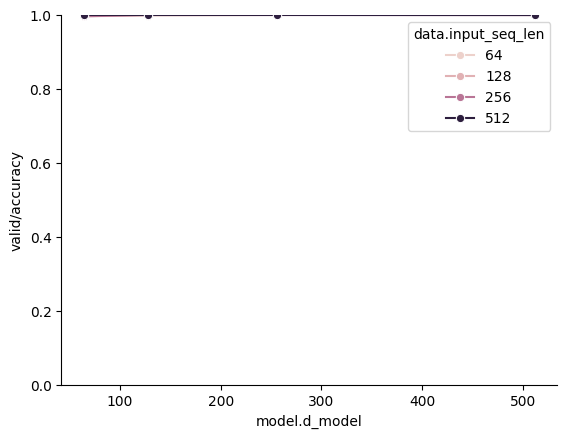

In [13]:
plot_df = df.groupby(
    [
        "model.d_model",
        "data.input_seq_len",
    ]
)["valid/accuracy"].max().reset_index()
sns.lineplot(
    data=plot_df,
    x="model.d_model",
    y="valid/accuracy",
    hue="data.input_seq_len",
    marker="o"
)
plt.ylim(0, 1)
sns.despine()

In [ ]:
df["model.sequence_mixer.name"]